In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import cv2 

In [8]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Building the neural network (here this network has one hidden layer with 100 nodes)

In [23]:
mlp=MLPClassifier(hidden_layer_sizes=(100,),max_iter=10,random_state=42);
mlp.fit(X_train,y_train)

c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=42)

# this cell predicts the image's class of each image and appends it to its filename and saves it

In [ ]:

# test_pred=mlp.predict(X_test)
# for i in range(len(test_pred)):
#     # Reshape the flattened image to its original shape (assuming it's a 28x28 image)
#     image = X_test.iloc[i].values.reshape(28, 28)

#     # Display the image
#     cv2.imshow(f"Predicted Label: {test_pred[i]}", image)

#     # Save the image with a unique filename
#     cv2.imwrite(f'image_number_{i + 1}_predicted_label_{test_pred[i]}.png', image)

#     # Wait for a key press and close the window
#     cv2.waitKey(1)
#     cv2.destroyAllWindows()
    

In [24]:
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.933


# VISUALIZING SOME OF THE RANDOM IMAGE'S PREDICTIONS 

c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\Somashekar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature na

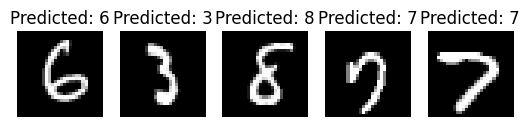

In [20]:
# Visualize a few predicted digits
num_samples = 5
for i in range(num_samples):
    index = np.random.randint(0, len(X_test))
    #converting the 1D pixel values back to 2D image 
    image = X_test.iloc[index].values.reshape(28, 28)
    prediction = mlp.predict([X_test.iloc[index]])
    
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Predicted: {prediction[0]}")
    plt.axis('off')

plt.show()

In [28]:
# from sklearn.metrics import classification_report
# # report based on tain data
# print(classification_report(y_train,X_train))
